## Procesar datos del Ayuntamiento

In [ ]:
from google.colab import auth
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
from pydrive.drive import GoogleDrive
import pandas as pd


# Google user authentication. It asks for permissions in a pop-up window
gauth = GoogleAuth()  # Authentication object to connect to Google Drive
gauth.credentials = GoogleCredentials.get_application_default()  # Credentials for Google Drive authentication object
auth.authenticate_user()
drive = GoogleDrive(gauth)  # Google Drive object
drive.CreateFile({'id': '1BdmqC5fwSvL_kvX4rIjJ0GRyjIOnCXP8'}).GetContentFile('11-2024.zip') # el id del modelo en drive y el nombre.file, pydrive trae archivos de google drive al entorno collab

In [ ]:
import zipfile
import os

zip_filename = "11-2024.zip"  # Replace with the actual filename
extract_path = "/content/"  # Define extraction path

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
df_2025_01 = pd.read_csv("/content/01-2025.csv", delimiter = ";")
df_2024_12 = pd.read_csv("/content/12-2024.csv", delimiter = ";")
df_2024_11 = pd.read_csv("/content/11-2024.csv", delimiter = ";")

In [ ]:
final_merged = pd.concat([df_2025_01,df_2024_12,df_2024_11])

In [ ]:
final_merged = final_merged[["id","fecha","ocupacion","carga"]]

In [ ]:
final_merged["fecha"] = pd.to_datetime(final_merged["fecha"])

In [ ]:
final_merged = final_merged.assign(year=final_merged["fecha"].dt.year,month=final_merged["fecha"].dt.month,
                    day=final_merged["fecha"].dt.day,
                    hour=final_merged["fecha"].dt.hour,
                    week_day=final_merged["fecha"].dt.day_name())

In [ ]:
final_merged = final_merged.groupby(["id","year","month","day","hour","week_day"]).agg({"ocupacion":"mean"}).reset_index()

In [ ]:
datos = pd.read_excel("/content/pmed_ubicacion_01-2025.xlsx")

,tipo_elem,distrito,id,cod_cent,nombre,utm_x,utm_y,longitud,latitud
0,URB,4.0,3937,05009,Serrano N-S - General Oraa-Diego de Leon,441778.976129,4.476398e+06,-3.686452,40.436193
1,URB,15.0,5947,45001,Hermanos García Noblejas - Dr. Cirajas-Vital Aza,446034.529936,4.476272e+06,-3.636269,40.435345
2,URB,15.0,10307,53053,Santa Genoveva - Santa Genoveva-Av. Trece Rosas,445059.893465,4.475300e+06,-3.647676,40.426521
3,URB,15.0,6135,53057,Av. Marqués de Corbera - Ntra. Sra. del Villar...,444630.020772,4.475155e+06,-3.652731,40.425186
4,URB,15.0,10447,53062,Francisco Villaespesa - José María Pereda-Herm...,445042.418145,4.475567e+06,-3.647905,40.428921
...,...,...,...,...,...,...,...,...,...
4955,URB,10.0,4906,98012,LOS YEBENES ENTRADA CRUCE SENTIDO E-O,435897.117506,4.472157e+06,-3.755369,40.397548
4956,URB,10.0,4903,98014,VALMOJADO ENTRE YEBENES Y SESEÑA,435781.355241,4.472179e+06,-3.756735,40.397741
4957,URB,10.0,3637,98021,CTRA. BOADILLA E-O (N-V-CARABIAS),435057.241428,4.472314e+06,-3.765281,40.398899
4958,URB,10.0,5179,98022,CTRA. BOADILLA O-E (CARABIAS-N-V),435057.323458,4.472310e+06,-3.765280,40.398863


In [ ]:
final_merged= final_merged.merge(datos, on="id", how="inner")

In [ ]:
final_merged = final_merged[["id","year","month","day","hour","week_day","ocupacion","distrito"]]

In [ ]:
final_merged.to_csv("datos_tp_procesados.csv")

## Incorporacion datos climaticos

In [ ]:
from google.colab import auth
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
from pydrive.drive import GoogleDrive
import pandas as pd
import numpy as np


# Google user authentication. It asks for permissions in a pop-up window
gauth = GoogleAuth()  # Authentication object to connect to Google Drive
gauth.credentials = GoogleCredentials.get_application_default()  # Credentials for Google Drive authentication object
auth.authenticate_user()
drive = GoogleDrive(gauth)  # Google Drive object
drive.CreateFile({'id': '1UGlUSKbnMK72Yxnf136JzPoRTk86o13B'}).GetContentFile('datos_tp_procesados.csv') # el id del modelo en drive y el nombre.file, pydrive trae archivos de google drive al entorno collab

In [ ]:
data = pd.read_csv("/content/datos_tp_procesados.csv")

In [ ]:
holidays = [
    "2024-11-01",  # 1 November 2024
    "2024-12-06",  # 6 December 2024
    "2024-12-25",  # 25 December 2024
    "2025-01-01",  # 1 January 2025
    "2025-01-06",  # 6 January 2025
]

# Convert holidays to datetime format
holidays = pd.to_datetime(holidays)

# Assume the DataFrame is named `df`
data["date"] = pd.to_datetime(data[["year", "month", "day"]])  # Create a date column

# Add the "festivo" column: 1 if it's a holiday, 0 otherwise
data["festivo"] = data["date"].isin(holidays).astype(int)

# Display the first few rows to verify
data.drop("date", axis = 1, inplace = True)


In [ ]:
data_agg = data.groupby(["week_day","hour"]).agg({"ocupacion":"mean"}).reset_index()
data_agg = data_agg.loc[data_agg.hour >=7]

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/sta

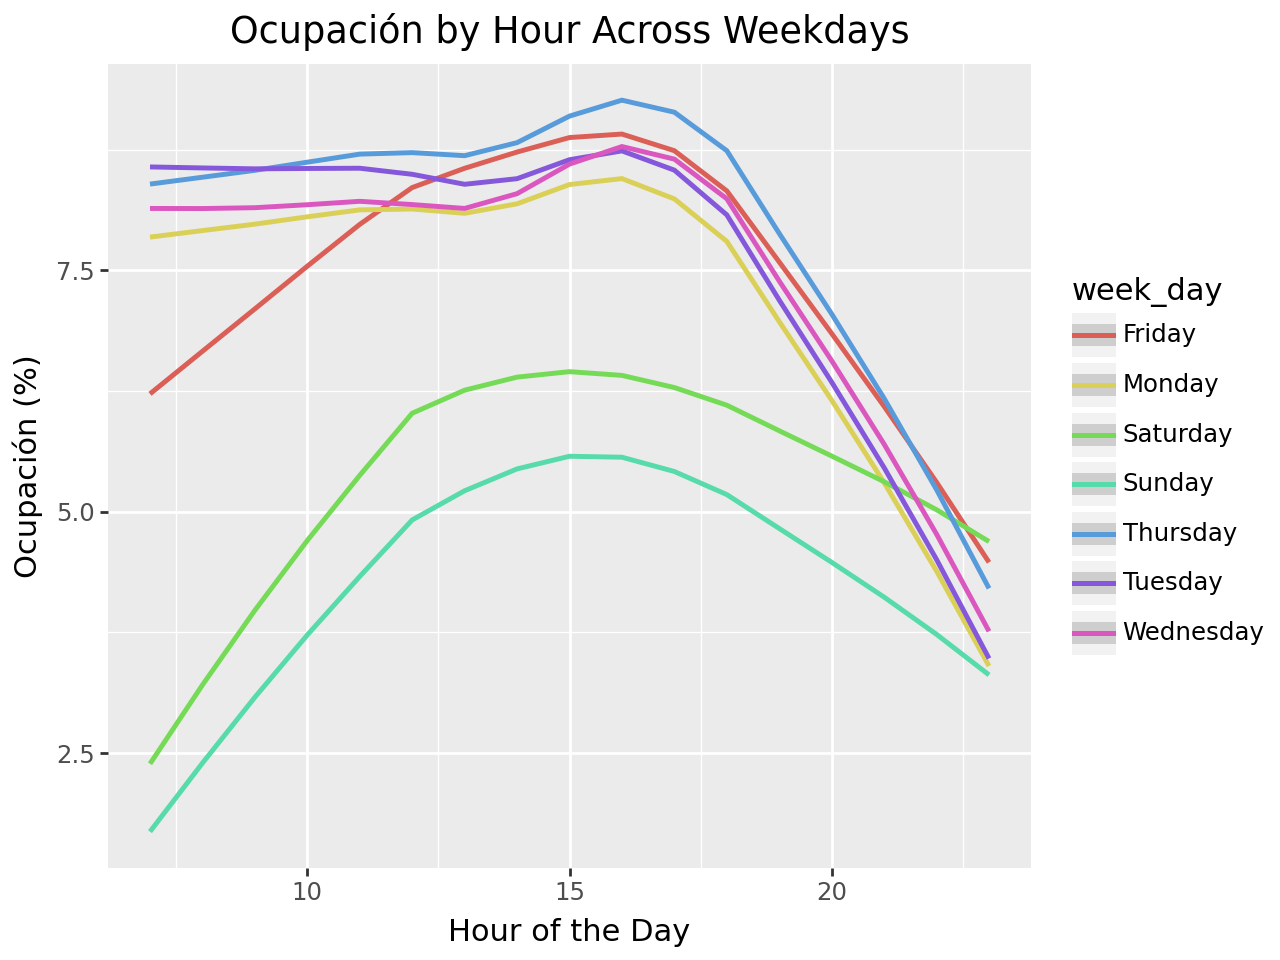

In [ ]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, theme, element_text, element_rect, geom_point, geom_line, geom_smooth


ggplot(data_agg) + aes(x="hour", y="ocupacion", color="week_day")+ geom_smooth() + labs(
    title="Ocupación by Hour Across Weekdays",
    x="Hour of the Day",
    y="Ocupación (%)",
    fill="Day of the Week"
)



In [ ]:
data_climate = pd.read_excel("/content/export (1).xlsx")

In [ ]:
data_climate.drop(["snow","wpgt","tsun"], axis = 1, inplace = True)

In [ ]:
data_climate["date"] = pd.to_datetime(data_climate["date"])

In [ ]:
data_climate = data_climate.assign(year=data_climate["date"].dt.year,month=data_climate["date"].dt.month,
                    day=data_climate["date"].dt.day)
data_climate.drop(["date"], axis = 1, inplace = True)

In [ ]:
data_climate = data_climate[["tavg","prcp","wspd","year","month","day"]]

In [ ]:
data_climate["prcp"] = np.where(data_climate["prcp"] > 0 , "Y", "N")

In [ ]:
data_climate["wspd"] = np.where(data_climate["wspd"] > 9.2 , "Y", "N")

,tavg,prcp,wspd,year,month,day
0,13.5,N,N,2024,11,1
1,13.2,N,Y,2024,11,2
2,12.3,N,Y,2024,11,3
3,12.9,Y,N,2024,11,4
4,13.0,N,N,2024,11,5
...,...,...,...,...,...,...
115,9.0,N,N,2025,2,24
116,9.8,N,Y,2025,2,25
117,6.7,N,N,2025,2,26
118,7.4,Y,N,2025,2,27


In [ ]:
final_merged= data.merge(data_climate, on=["year","month","day"], how="inner")

,Unnamed: 0,id,year,month,day,hour,week_day,ocupacion,distrito,festivo,tavg,prcp,wspd
0,0,1002,2024,11,29,10,Friday,12.00,10.0,0,8.6,N,N
1,1,1002,2024,11,29,11,Friday,11.25,10.0,0,8.6,N,N
2,2,1002,2024,11,29,12,Friday,9.50,10.0,0,8.6,N,N
3,3,1002,2024,11,29,13,Friday,9.75,10.0,0,8.6,N,N
4,4,1002,2024,11,29,14,Friday,12.00,10.0,0,8.6,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908230,9908230,11391,2025,1,31,19,Friday,5.00,19.0,0,3.8,N,N
9908231,9908231,11391,2025,1,31,20,Friday,5.00,19.0,0,3.8,N,N
9908232,9908232,11391,2025,1,31,21,Friday,3.75,19.0,0,3.8,N,N
9908233,9908233,11391,2025,1,31,22,Friday,3.50,19.0,0,3.8,N,N


In [ ]:
final_merged["festivo"] = final_merged["festivo"].astype(str)

In [ ]:
data_agg = final_merged.groupby(["week_day","hour","prcp"]).agg({"ocupacion":"mean"}).reset_index()
data_agg = data_agg.loc[data_agg.hour >=7]

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/sta

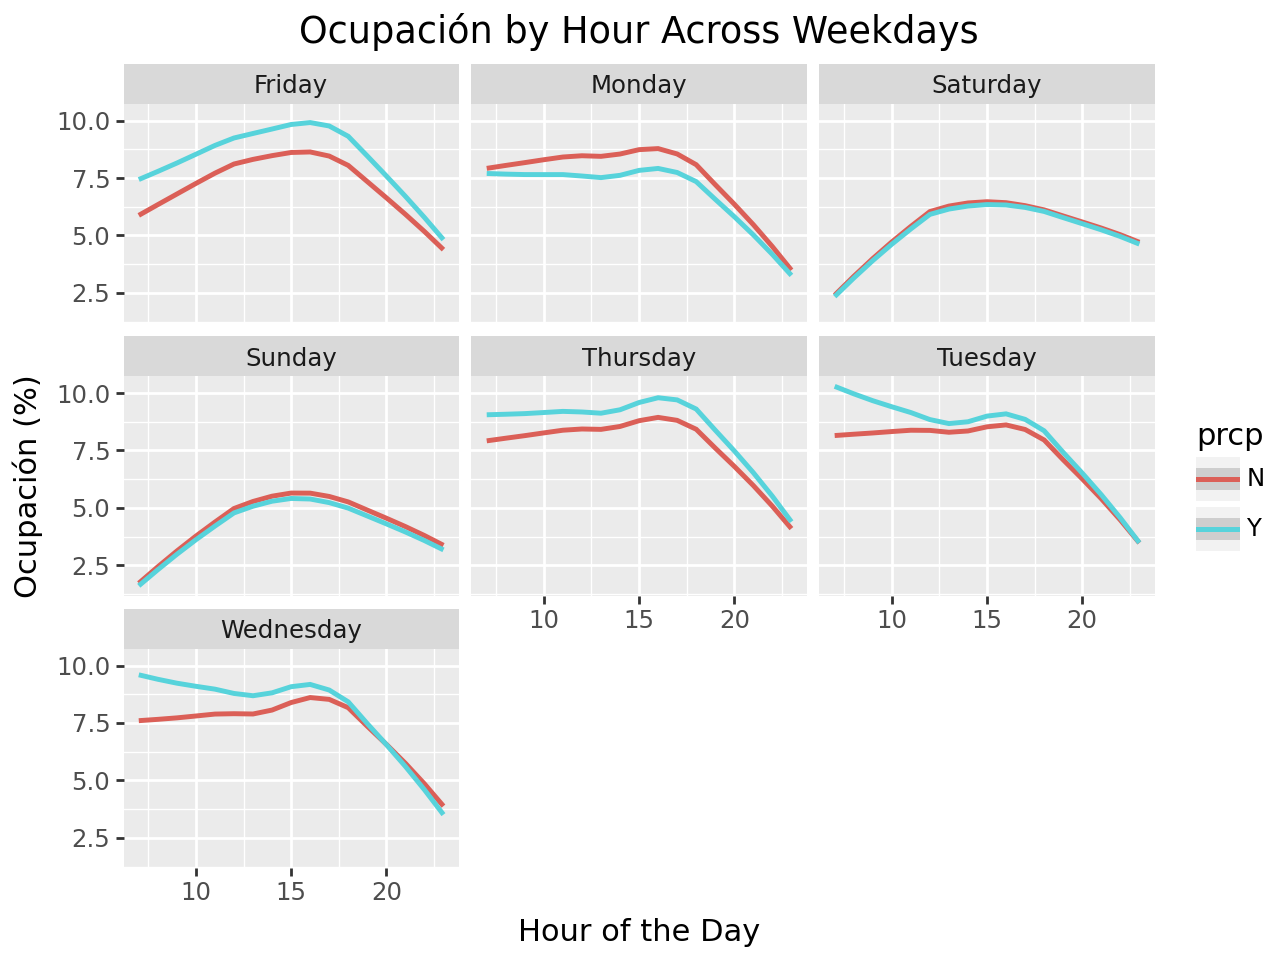

In [ ]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, theme, element_text, element_rect, geom_point, geom_line, geom_smooth


ggplot(data_agg) + aes(x="hour", y="ocupacion", color="prcp")+ geom_smooth() + facet_wrap("~week_day") + labs(
    title="Ocupación by Hour Across Weekdays",
    x="Hour of the Day",
    y="Ocupación (%)",
    fill="Day of the Week"
)

In [ ]:
final_merged.to_csv("datos_tp_procesados.csv")

## Analizar datos con clima

In [ ]:
from google.colab import auth
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
from pydrive.drive import GoogleDrive
import pandas as pd
import numpy as np


# Google user authentication. It asks for permissions in a pop-up window
gauth = GoogleAuth()  # Authentication object to connect to Google Drive
gauth.credentials = GoogleCredentials.get_application_default()  # Credentials for Google Drive authentication object
auth.authenticate_user()
drive = GoogleDrive(gauth)  # Google Drive object
drive.CreateFile({'id': '1UGlUSKbnMK72Yxnf136JzPoRTk86o13B'}).GetContentFile('datos_tp_procesados.csv') # el id del modelo en drive y el nombre.file, pydrive trae archivos de google drive al entorno collab

In [ ]:
data = pd.read_csv("/content/datos_tp_procesados.csv")

In [ ]:
distritos = {
    "1.0": "Centro", "2.0": "Arganzuela",
    "3.0": "Retiro","4.0": "Salamanca",
    "5.0": "Chamartín","6.0": "Tetuán",
    "7.0": "Chamberí", "8.0": "Fuencarral-El Pardo",
    "9.0": "Moncloa", "10.0": "Latina",
    "11.0": "Carabanchel", "12.0": "Usera",
    "13.0": "Puente de Vallecas", "14.0": "Moratalaz",
    "15.0": "Ciudad Lineal","16.0": "Hortaleza",
    "17.0": "Villaverde", "18.0": "Villa de Vallecas",
    "19.0": "Vicálvaro","20.0": "San Blas",
    "21.0": "Barajas"
}

data["distrito"] = data["distrito"].astype(str)


In [ ]:
data["distrito"] = data["distrito"].map(distritos)

In [ ]:
data["year"] = data["year"].astype(str)
data["month"] = data["month"].astype(str)
data["day"] = data["day"].astype(str)
data["hour"] = data["hour"].astype(str)
data["festivo"] = data["festivo"].astype(str)
data["ocupacion"] = data["ocupacion"]/100

In [ ]:
festivo_tomorrow = pd.DataFrame(data.assign(date = pd.to_datetime(data["year"] + "-" + data["month"] + "-" + data["day"])).loc[data.festivo == "1"].assign(
    festivo_mañana = lambda x: x.date - pd.Timedelta(days=1)
)["festivo_mañana"].unique()).rename(columns = {0:"date"}).assign(year = lambda x: x.date.dt.year,
                                                                 month = lambda x: x.date.dt.month,
                                                                  day = lambda x: x.date.dt.day,
                                                                  festivo_tomorrow = "1").drop("date", axis = 1)

In [ ]:
festivo_tomorrow["year"] = festivo_tomorrow["year"].astype(str)
festivo_tomorrow["month"] = festivo_tomorrow["month"].astype(str)
festivo_tomorrow["day"] = festivo_tomorrow["day"].astype(str)
festivo_tomorrow["festivo_tomorrow"] = festivo_tomorrow["festivo_tomorrow"].astype(str)
data = data.merge(festivo_tomorrow, on=["year","month","day"], how="left")


In [ ]:
data.festivo_tomorrow = data.festivo_tomorrow.fillna("0")

In [ ]:
data["year"] = data["year"].astype(int)
data["month"] = data["month"].astype(int)
data["day"] = data["day"].astype(int)
data["hour"] = data["hour"].astype(int)

In [ ]:
data = data.loc[data.hour > 6]

In [ ]:
eventos_bernabeu = [
    "2024-11-05",
    "2024-11-09",
    "2024-12-01",
    "2024-12-22",
    "2025-01-16",
    "2025-01-19",
    "2025-01-22"
]

# Convert holidays to datetime format
eventos_bernabeu = pd.to_datetime(eventos_bernabeu)

# Assume the DataFrame is named `df`
data["date"] = pd.to_datetime(data[["year", "month", "day"]])  # Create a date column

# Add the "festivo" column: 1 if it's a holiday, 0 otherwise
data["evento_bernabeu"] = data["date"].isin(eventos_bernabeu).astype(int)

# Display the first few rows to verify
data.drop("date", axis = 1, inplace = True)

In [ ]:
data.to_csv("datos_tp_procesados.csv")

# Statistical Association

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

groups = data.groupby('distrito')['ocupacion'].apply(list)

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*groups)


np.float64(5606.155319420984)

In [ ]:
data_agg = data.groupby(["week_day","hour","prcp"]).agg({"ocupacion":"mean"}).reset_index()

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/sta

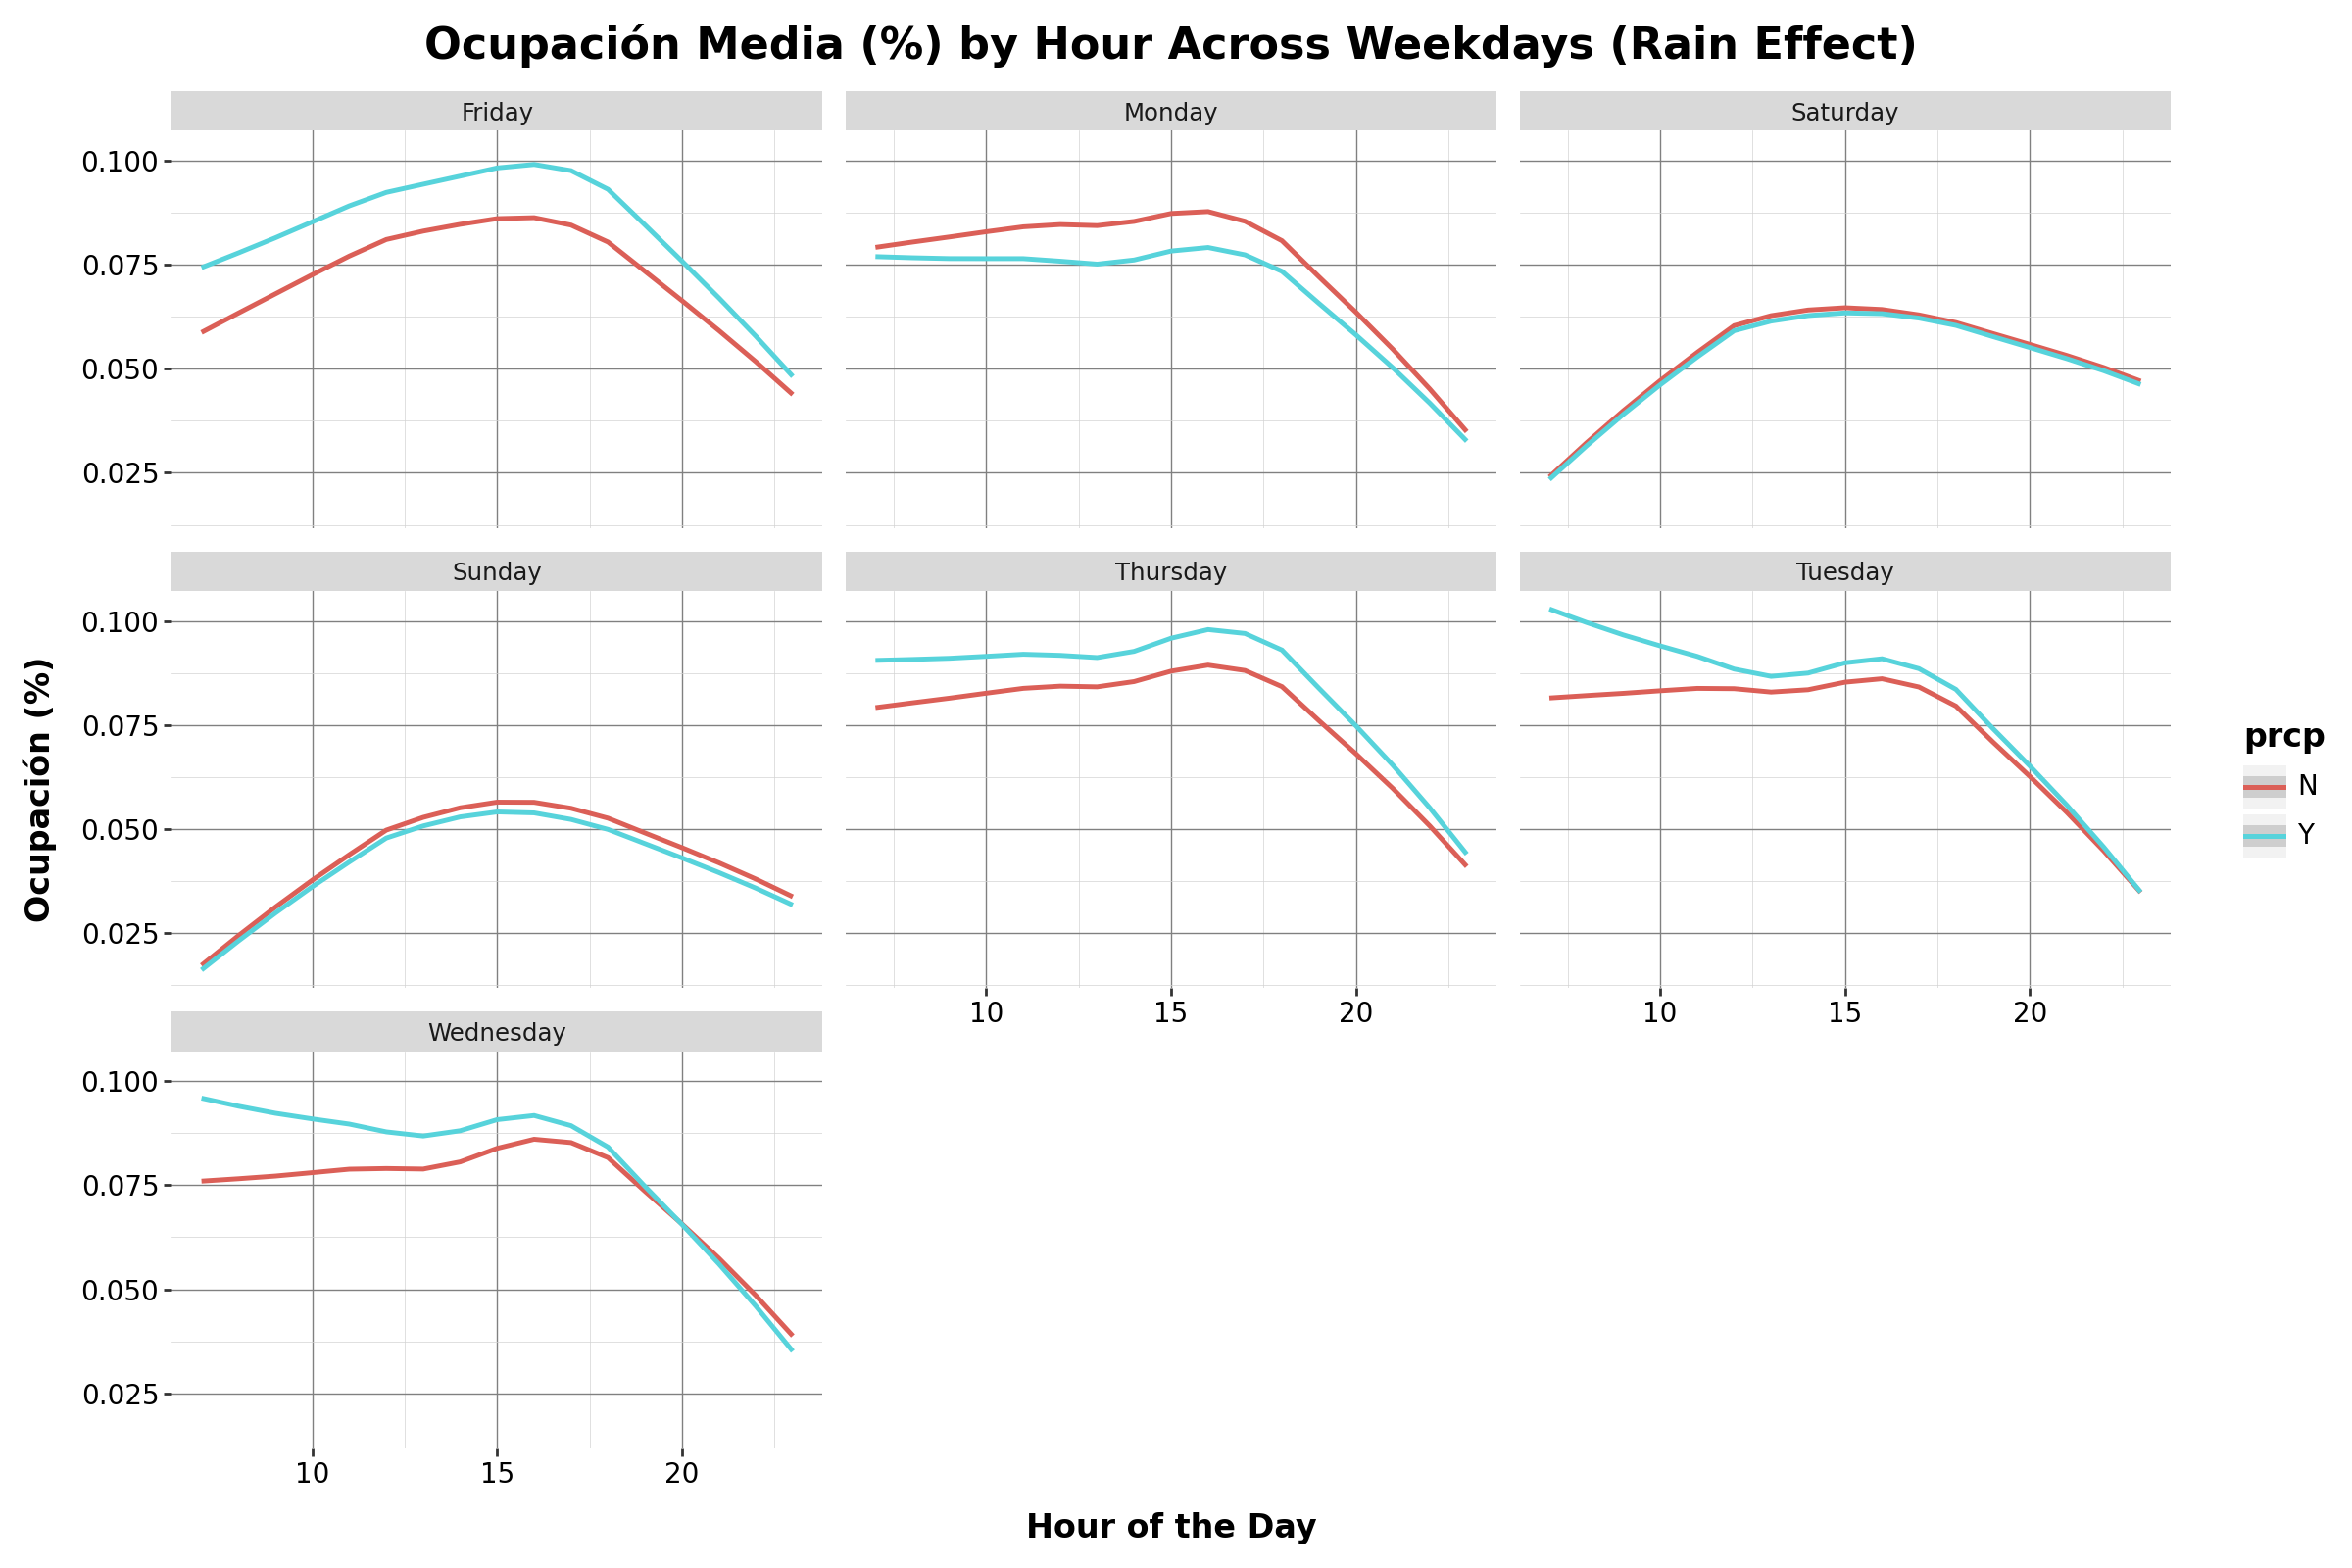

In [ ]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, theme, element_text, element_rect, geom_point, geom_line, geom_smooth, element_line


ggplot(data_agg) + aes(x="hour", y="ocupacion", color="prcp")+ geom_smooth() + facet_wrap("~week_day") + labs(
    title="Ocupación Media (%) by Hour Across Weekdays (Rain Effect)",
    x="Hour of the Day",
    y="Ocupación (%)",
    fill="Day of the Week"
) + theme(
        figure_size=(12, 8),  # Set the overall figure size
        plot_title=element_text(size=16, weight="bold", ha="center"),
        axis_title=element_text(size=12, weight="bold"),
        axis_text=element_text(size=10, color="black"),
        legend_title=element_text(size=12, weight="bold"),
        legend_text=element_text(size=10),
        panel_background=element_rect(fill="white", color="white"),
        panel_grid_major=element_line(color="grey", size=0.5),
        panel_grid_minor=element_line(color="lightgrey", size=0.25)
    )


In [ ]:
data_agg = data.groupby(["week_day","hour","festivo_tomorrow"]).agg({"ocupacion":"mean"}).reset_index()

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/sta

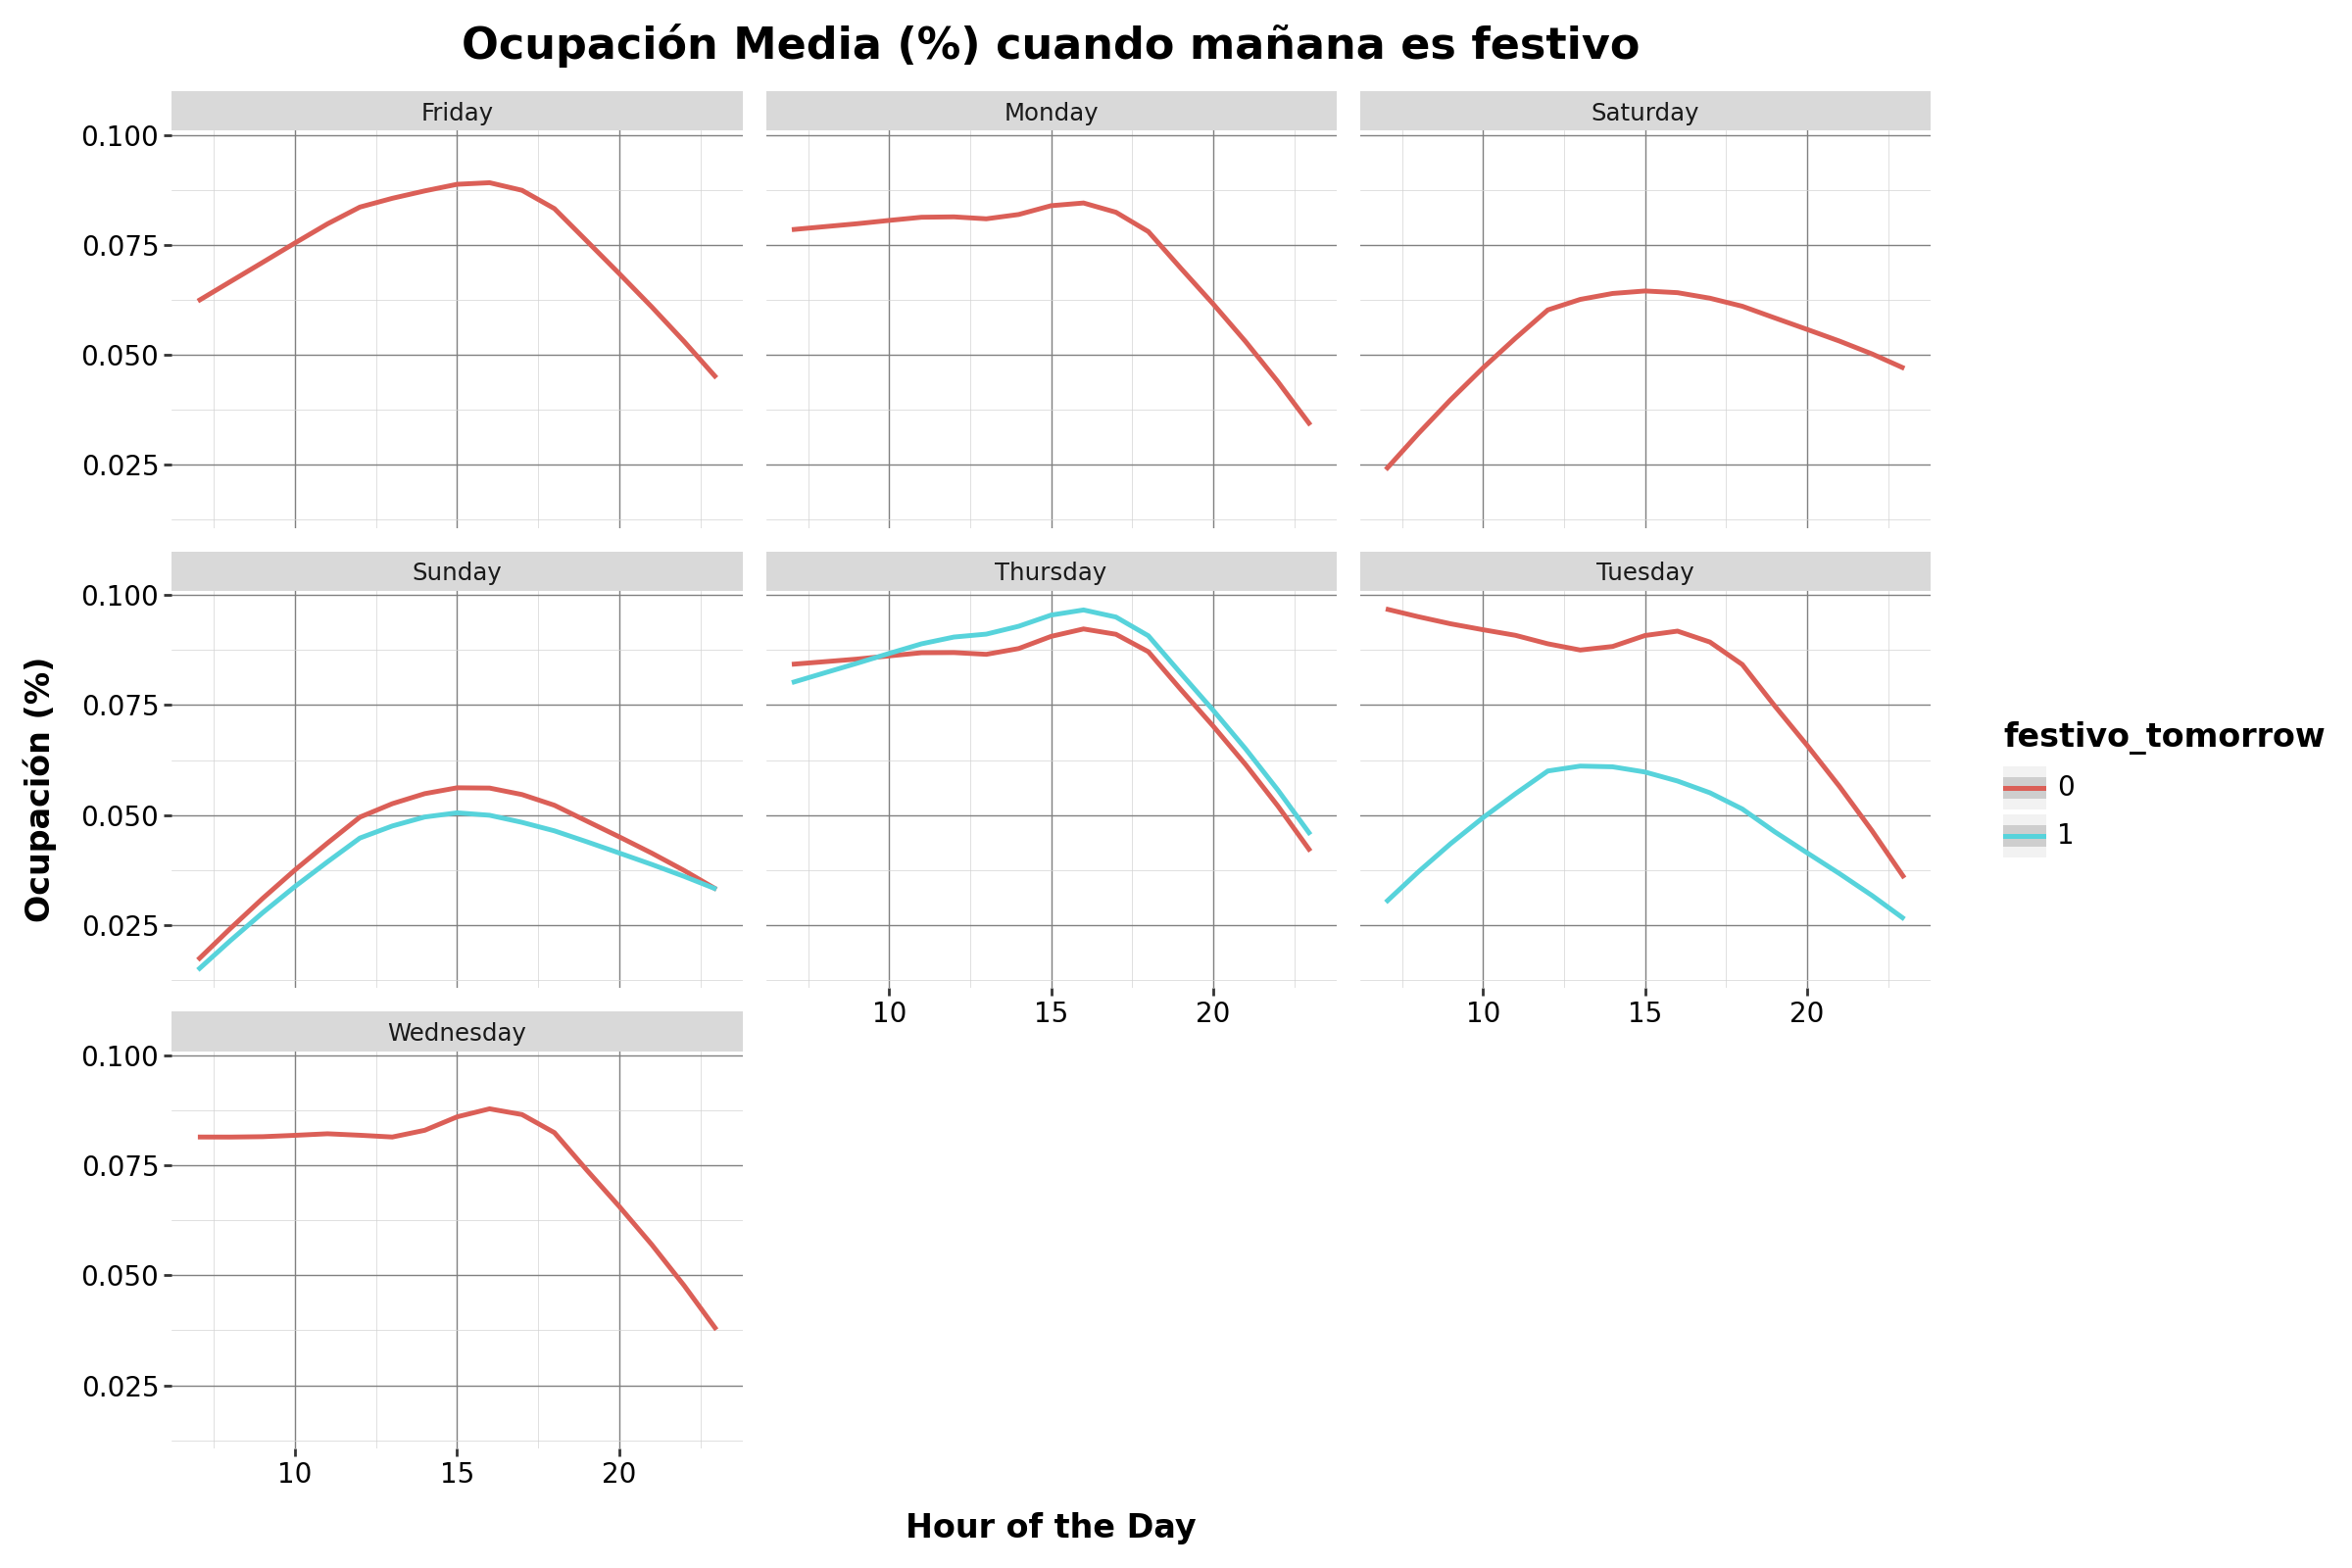

In [ ]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, theme, element_text, element_rect, geom_point, geom_line, geom_smooth, element_line


ggplot(data_agg) + aes(x="hour", y="ocupacion", color="festivo_tomorrow")+ geom_smooth() + facet_wrap("~week_day") + labs(
    title="Ocupación Media (%) cuando mañana es festivo",
    x="Hour of the Day",
    y="Ocupación (%)",
    fill="Day of the Week"
) + theme(
        figure_size=(12, 8),  # Set the overall figure size
        plot_title=element_text(size=16, weight="bold", ha="center"),
        axis_title=element_text(size=12, weight="bold"),
        axis_text=element_text(size=10, color="black"),
        legend_title=element_text(size=12, weight="bold"),
        legend_text=element_text(size=10),
        panel_background=element_rect(fill="white", color="white"),
        panel_grid_major=element_line(color="grey", size=0.5),
        panel_grid_minor=element_line(color="lightgrey", size=0.25)
    )


In [ ]:
data_agg = data.groupby(["distrito","hour"]).agg({"ocupacion":"mean"}).reset_index()
data_agg = data_agg.loc[data_agg.distrito.isin(["Centro","Fuencarral-El Pardo","Chamberí","Ciudad Lineal","Puente de Vallecas","Salamanca","Barajas","Chamartín"])]

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/sta

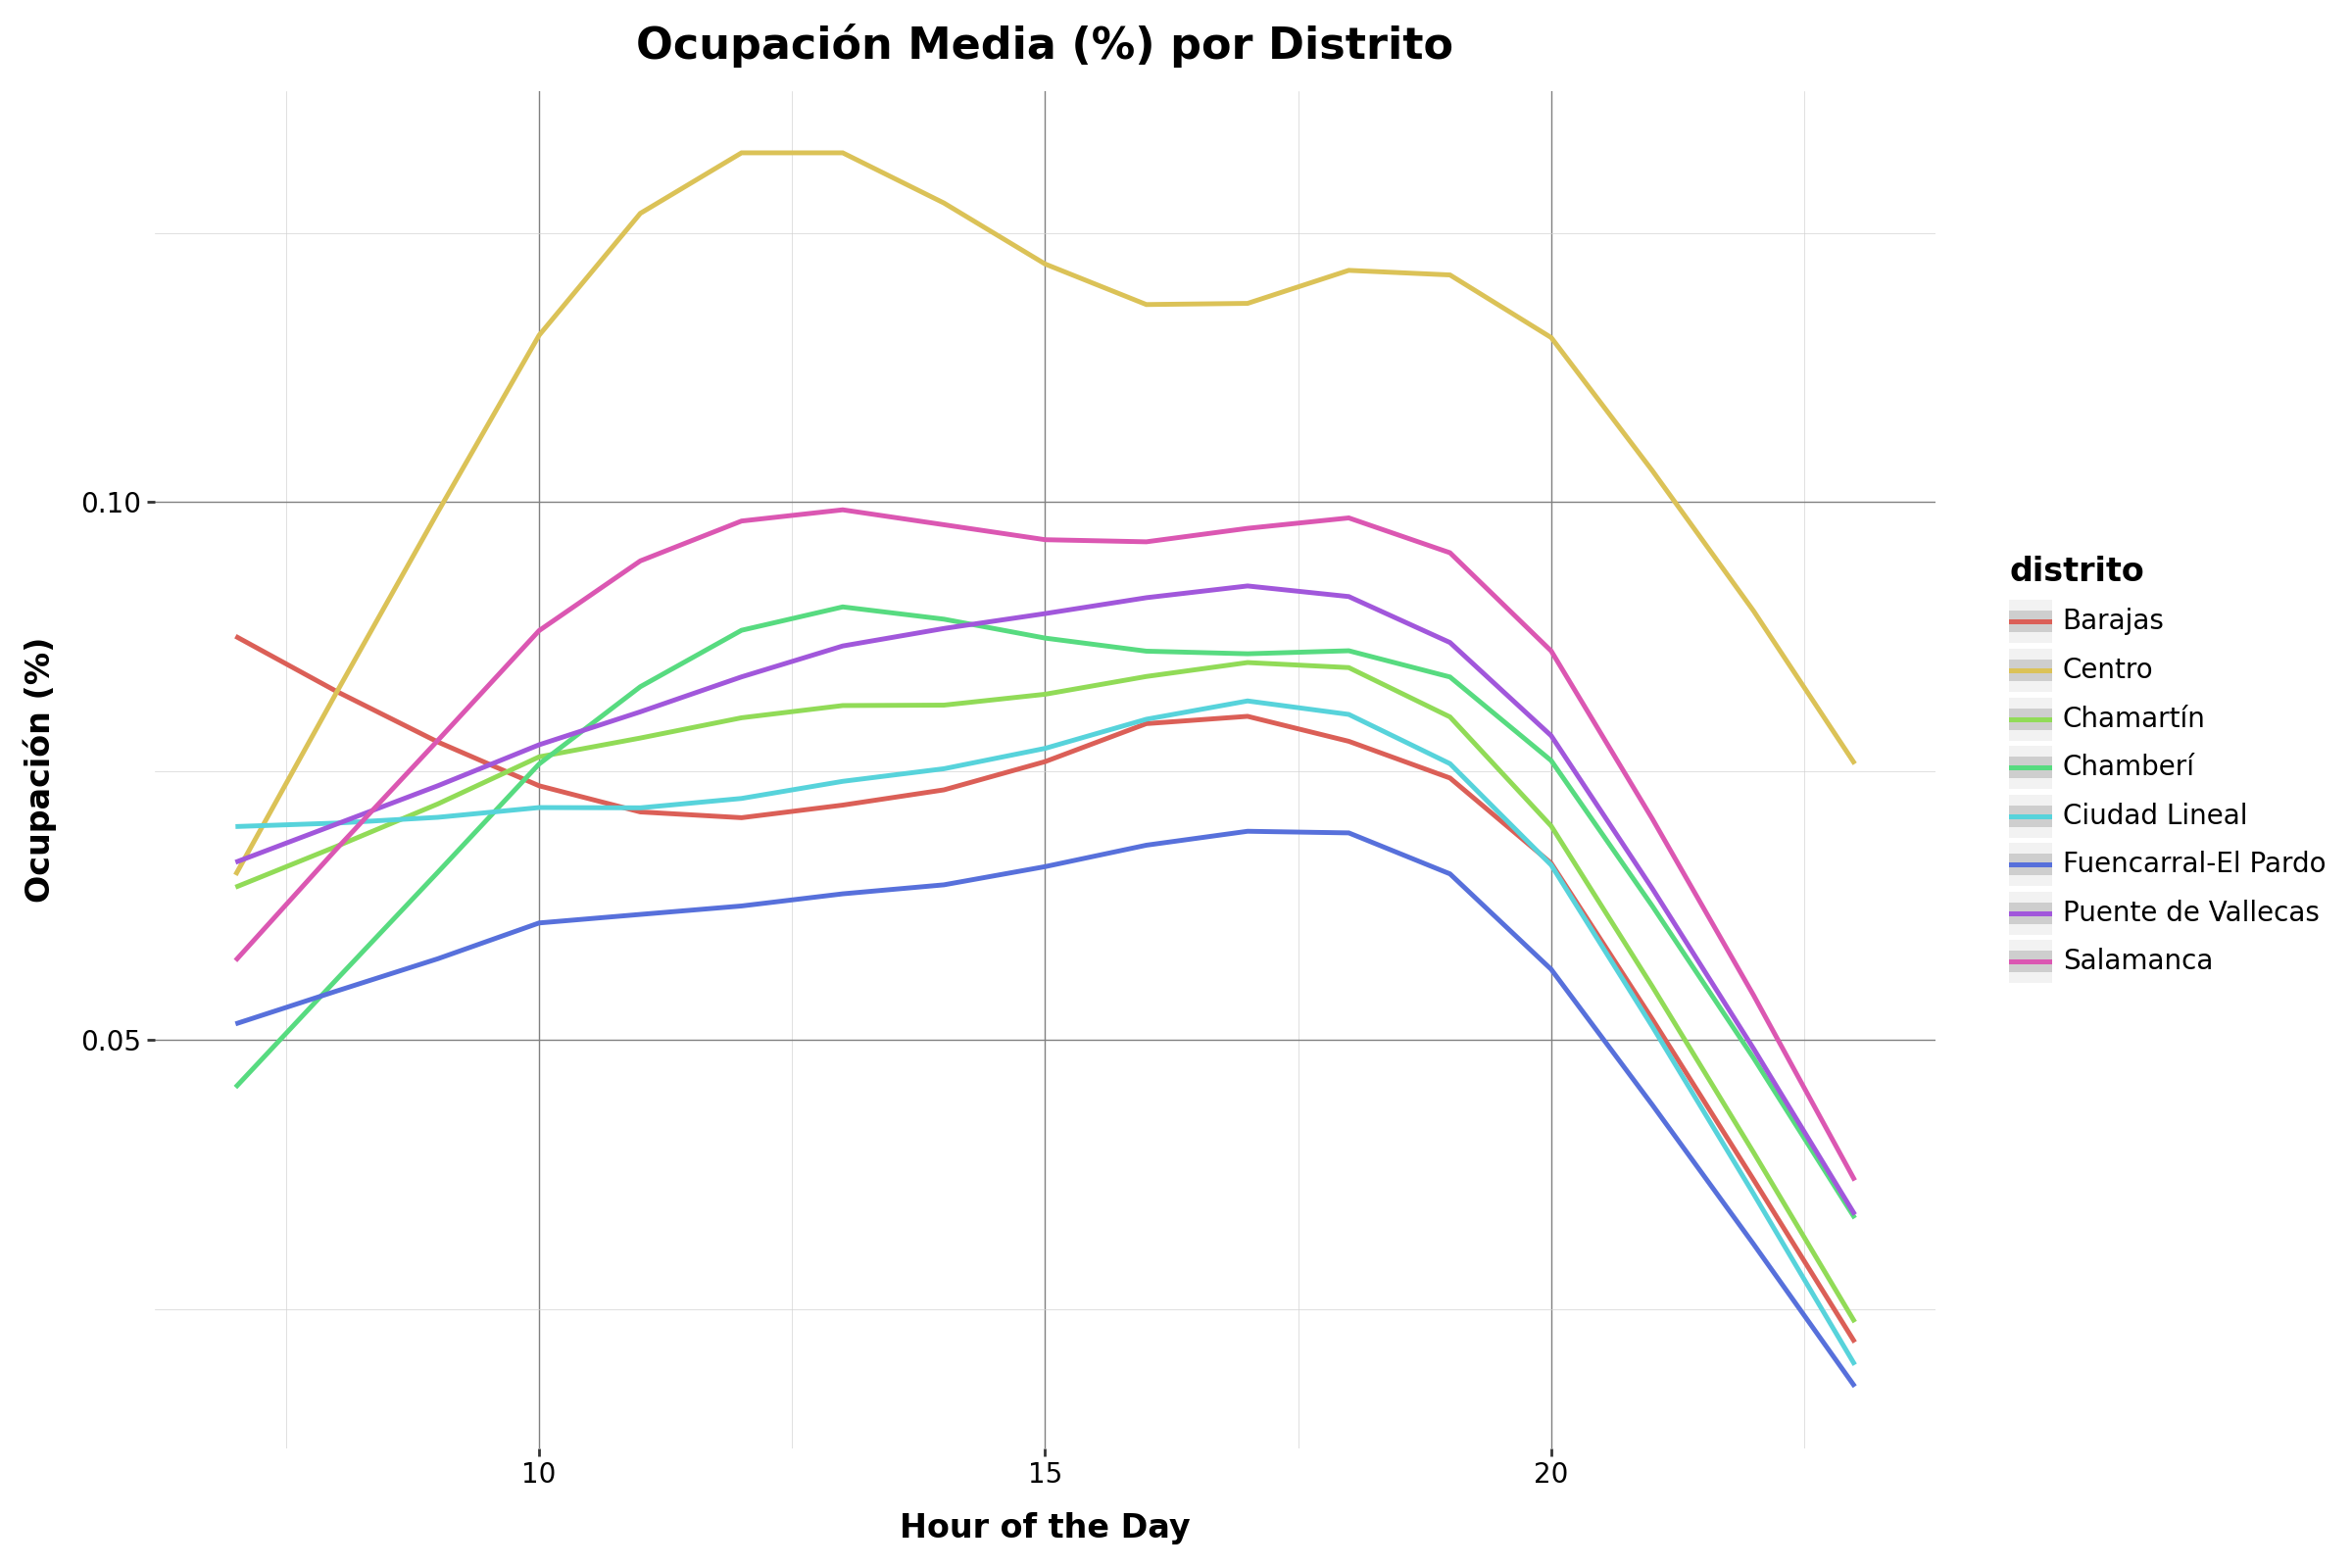

In [ ]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, theme, element_text, element_rect, geom_point, geom_line, geom_smooth, element_line


ggplot(data_agg) + aes(x="hour", y="ocupacion", color="distrito")+ geom_smooth(span = 0.5) + labs(
    title="Ocupación Media (%) por Distrito",
    x="Hour of the Day",
    y="Ocupación (%)",
    fill="Day of the Week"
) + theme(
        figure_size=(12, 8),  # Set the overall figure size
        plot_title=element_text(size=16, weight="bold", ha="center"),
        axis_title=element_text(size=12, weight="bold"),
        axis_text=element_text(size=10, color="black"),
        legend_title=element_text(size=12, weight="bold"),
        legend_text=element_text(size=10),
        panel_background=element_rect(fill="white", color="white"),
        panel_grid_major=element_line(color="grey", size=0.5),
        panel_grid_minor=element_line(color="lightgrey", size=0.25)
    )


In [ ]:
data.dropna(inplace= True)

,Unnamed: 0.1,Unnamed: 0,id,year,month,day,hour,week_day,ocupacion,distrito,festivo,tavg,prcp,wspd,festivo_tomorrow,evento_bernabeu
0,0,0,1002,2024,11,29,10,Friday,2,Latina,0,8.6,N,N,0,0
1,1,1,1002,2024,11,29,11,Friday,2,Latina,0,8.6,N,N,0,0
2,2,2,1002,2024,11,29,12,Friday,1,Latina,0,8.6,N,N,0,0
3,3,3,1002,2024,11,29,13,Friday,1,Latina,0,8.6,N,N,0,0
4,4,4,1002,2024,11,29,14,Friday,2,Latina,0,8.6,N,N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908230,9908230,9908230,11391,2025,1,31,19,Friday,1,Vicálvaro,0,3.8,N,N,0,0
9908231,9908231,9908231,11391,2025,1,31,20,Friday,1,Vicálvaro,0,3.8,N,N,0,0
9908232,9908232,9908232,11391,2025,1,31,21,Friday,1,Vicálvaro,0,3.8,N,N,0,0
9908233,9908233,9908233,11391,2025,1,31,22,Friday,1,Vicálvaro,0,3.8,N,N,0,0


## Poisson Regression Analysis

Poisson distribution assumes a constant rate Lambda for the number of ocurrences for a certain event in a surface area/time interval. Poisson regression assumes lambda is a non-constant variable which is a function of additional information. For each specific case, the distribution is completely different. In our case Lambda = f(Time, Day of the week, District, Rain, Wind, Football events, festive day)


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data = pd.read_csv("/content/datos_tp_procesados.csv")

data = data.loc[(data.ocupacion > 0) & (data.ocupacion < 1)]

In [ ]:
print(data.loc[data.ocupacion > 0].ocupacion.var())
print(data.loc[data.ocupacion > 0].ocupacion.mean())

0.010763992725129068
0.07348023867871348


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume your DataFrame is called 'data'
# Group by 'ocupacion' and count the occurrences
# Plot the counts as a bar chart
data_1.ocupacion.plot(kind='density')

plt.xlabel("Ocupacion")
plt.ylabel("Count")
plt.title("Count by Ocupacion")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


,ocupacion
1217011,0.1575
6275312,0.0050
3981285,0.1225
4254099,0.0025
2102255,0.0100
...,...
3692490,0.1025
3641405,0.0150
2654191,0.0150
3962540,0.0775


In [ ]:
data_1 = data.sample(round(0.15*data.shape[0]), random_state= 42)
data_2 = data.sample(round(0.15*data.shape[0]), random_state= 52)
data_3 = data.sample(round(0.15*data.shape[0]), random_state= 62)
data_4 = data.sample(round(0.15*data.shape[0]), random_state= 64)

In [ ]:
data_1.groupby("ocupacion").size().reset_index().sort_values(by = "ocupacion", ascending = False)

,ocupacion,0
559,0.997500,14
558,0.996667,2
557,0.995000,45
556,0.993333,5
555,0.992500,85
...,...,...
4,0.007500,37469
3,0.006667,714
2,0.005000,35524
1,0.003333,944


In [ ]:
data_1["hour"] = data_1["hour"].astype("float")

data_1["tavg"] = data_1["tavg"].astype("float")
data_1["prcp"] = data_1["prcp"].astype("object")

data_1["day"] = data_1["day"].astype("float")


data_1["wspd"] = data_1["wspd"].astype("object")
data_1["festivo_tomorrow"] = data_1["festivo_tomorrow"].astype("object")

data_1["festivo"] = data_1["festivo"].astype("object")

data_1["evento_bernabeu"] = data_1["evento_bernabeu"].astype("object")


In [ ]:
from patsy import dmatrices
import statsmodels.api as sm

mask = np.random.rand(len(data_1)) < 0.7  # Randomly select 70% for training
df_train = data_1[mask]  # Training set
df_test = data_1[~mask]

# Beta regression formula
expr_beta = """ocupacion ~ hour + I(hour**2) + week_day + distrito + prcp + wspd + festivo_tomorrow + festivo + hour:week_day + I(np.log(hour + 1))"""


# Create the X and y matrices for Beta regression
y_train_beta, X_train_beta = dmatrices(expr_beta, df_train, return_type='dataframe')
y_test_beta, X_test_beta = dmatrices(expr_beta, df_test, return_type='dataframe')


# Fit Beta regression model
beta_model = sm.GLM(y_train_beta, X_train_beta, family=sm.families.Binomial()).fit()

# Print summary of the model
print(beta_model.summary())


# Make predictions for the test set
beta_predictions = beta_model.predict(X_test_beta)




,0
4254099,0.0
1376926,0.0
4505920,0.0
3031004,0.0
6390433,0.0
...,...
6550570,0.0
4443315,0.0
3627683,0.0
1561635,0.0


In [ ]:
results = pd.concat([beta_predictions.reset_index(drop = True),y_test_beta.reset_index(drop = True)], axis = 1).rename({0:"Pred"}, axis = 1)
results.corr()

0.0625

In [ ]:
# preds = pd.concat([round(pd.DataFrame({"pred" : nb2_predictions.predicted})).reset_index(drop = True), y_test.reset_index(drop = True)], axis = 1)

# from sklearn.metrics import mean_squared_error
# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(preds["pred"], preds["ocupacion"]))


np.float64(0.9765402151660595)

In [ ]:
pd.crosstab(preds["pred"], preds["ocupacion"])

ocupacion,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
pred,,,,,,,,,,
1.0,301255,29955,10001,5636,3585,1995,972,314,131,230
2.0,36952,8142,2836,1558,950,592,286,129,28,67


In [ ]:
2.7181**0.41

1.5067764593822113

In [ ]:
data_2["ocupacion"] = data_2["ocupacion"].astype(int)
data_2["hour"] = data_2["hour"].astype("float")

data_2["tavg"] = data_2["tavg"].astype("float")
data_2["prcp"] = data_2["prcp"].astype("object")


data_2["wspd"] = data_2["wspd"].astype("object")
data_2["festivo_tomorrow"] = data_2["festivo_tomorrow"].astype("object")

data_2["evento_bernabeu"] = data_2["evento_bernabeu"].astype("object")


In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#create a pandas DataFrame for the counts data set

#create the training and testing data sets
mask = np.random.rand(len(data_1)) < 0.7
df_train = data_2[mask]
df_test = data_2[~mask]


#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP
expr =  """ocupacion ~ hour + I(hour**2) + week_day + distrito + prcp + wspd + festivo_tomorrow + festivo + hour:week_day + I(np.log(hour + 1))"""

#Set up the X and y matrices for the training and testing data sets
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#train the NB2 model on the training data set
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha= 5)).fit()

#print the training summary
print(nb2_training_results.summary())

#make some predictions using our trained NB2 model
nb2_predictions = nb2_training_results.get_prediction(X_test)



In [ ]:
preds = pd.concat([round(pd.DataFrame({"pred" : nb2_predictions.predicted})).reset_index(drop = True), y_test.reset_index(drop = True)], axis = 1)

from sklearn.metrics import mean_squared_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(preds["pred"], preds["ocupacion"]))


9.964258544772756

In [ ]:
formula = '''
I(np.log(ocupacion + 1)) ~ evento_bernabeu + hour + evento_bernabeu:hour
'''

In [ ]:
import statsmodels.formula.api as smf


model = smf.ols(formula=formula, data=data_1.sample(frac = 0.2)).fit()
print(model.summary())




                               OLS Regression Results                               
Dep. Variable:     I(np.log(ocupacion + 1))   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                  0.002
Method:                       Least Squares   F-statistic:                     171.7
Date:                      Sun, 06 Apr 2025   Prob (F-statistic):          3.25e-111
Time:                              14:40:42   Log-Likelihood:             2.2431e+05
No. Observations:                    212154   AIC:                        -4.486e+05
Df Residuals:                        212150   BIC:                        -4.486e+05
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:

from statsmodels.othermod.betareg import BetaModel

from patsy import dmatrices

formula = '''
ocupacion ~
    hour + I(hour**2) +
    I(np.log(hour + 1)) +
    prcp + wspd +
    week_day + distrito + festivo + festivo_tomorrow +
    hour:week_day
'''

y, X = dmatrices(formula, data=data_1.sample(frac = 0.5), return_type='dataframe')


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example using the same formula as before
formula = 'ocupacion ~ hour + I(hour**2) + week_day + distrito + prcp + wspd + festivo + festivo_tomorrow + hour:week_day'

# Fit a Gamma GLM with a log link
gamma_model = smf.glm(
    formula=formula,
    data=data_1.sample(frac = 0.5),
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()

gamma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              ocupacion   No. Observations:               503382
Model:                            GLM   Df Residuals:                   503343
Model Family:                   Gamma   Df Model:                           38
Link Function:                    log   Scale:                          2.0986
Method:                          IRLS   Log-Likelihood:             7.7475e+05
Date:                Thu, 03 Apr 2025   Deviance:                   5.9544e+05
Time:                        20:29:49   Pearson chi2:                 1.06e+06
No. Iterations:                    18   Pseudo R-squ. (CS):            0.06078
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.4275      0.027   -162.134      0.000      -4.481      -4.374
week_day[T.Monday]                  0.2840      0.024     11.687      0.000       0.236       0.332
week_day[T.Saturday]               -0.9345      0.025    -37.638      0.000      -0.983      -0.886
week_day[T.Sunday]                 -1.0438      0.025    -41.490      0.000      -1.093      -0.995
week_day[T.Thursday]                0.2510      0.024     10.308      0.000       0.203       0.299
week_day[T.Tuesday]                 0.3185      0.024     13.036      0.000       0.271       0.366
week_day[T.Wednesday]               0.2727      0.024     11.139      0.000       0.225       0.321
distrito[T.Barajas]                 0.0365      0.025      1.478      0.139      -0.012       0.085
distrito[T.Carabanchel]             0.0855      0.012      7.298      0.000       0.063       0.108
distrito[T.Centro]                  0.3732      0.014     26.559      0.000       0.346       0.401
distrito[T.Chamartín]              -0.0764      0.012     -6.561      0.000      -0.099      -0.054
distrito[T.Chamberí]               -0.0755      0.015     -5.141      0.000      -0.104      -0.047
distrito[T.Ciudad Lineal]          -0.1230      0.011    -11.042      0.000      -0.145      -0.101
distrito[T.Fuencarral-El Pardo]    -0.2768      0.011    -25.571      0.000      -0.298      -0.256
distrito[T.Hortaleza]              -0.3722      0.012    -31.353      0.000      -0.395      -0.349
distrito[T.Latina]                 -0.0406      0.012     -3.256      0.001      -0.065      -0.016
distrito[T.Moncloa]                 0.0408      0.012      3.373      0.001       0.017       0.065
distrito[T.Moratalaz]              -0.1649      0.016    -10.492      0.000      -0.196      -0.134
distrito[T.Puente de Vallecas]      0.0213      0.013      1.611      0.107      -0.005       0.047
distrito[T.Retiro]                 -0.1181      0.014     -8.273      0.000      -0.146      -0.090
distrito[T.Salamanca]               0.0548      0.013      4.218      0.000       0.029       0.080
distrito[T.San Blas]               -0.2418      0.012    -19.926      0.000      -0.266      -0.218
distrito[T.Tetuán]                 -0.2645      0.013    -21.058      0.000      -0.289      -0.240
distrito[T.Usera]                   0.0869      0.015      5.948      0.000       0.058       0.116
distrito[T.Vicálvaro]              -0.1901      0.024     -8.047      0.000      -0.236      -0.144
distrito[T.Villa de Vallecas]      -0.0251      0.019     -1.325      0.185      -0.062       0.012
distrito[T.Villaverde]             -0.2368      0.015    -15.419      0.000      -0.267      -0.207
prcp[T.Y]                           0.0348      0.005      7.214      0.000       0

In [ ]:
preds = gamma_model.predict(data_2)

pd.concat([data_2["ocupacion"].reset_index(),preds.reset_index()], axis = 1).corr()

,index,ocupacion,index,0
index,1.000000,-0.099023,1.000000,-0.131543
ocupacion,-0.099023,1.000000,-0.099023,0.229083
index,1.000000,-0.099023,1.000000,-0.131543
0,-0.131543,0.229083,-0.131543,1.000000


In [ ]:
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel

model = BetaModel(y, X)
result = model.fit()
print(result.summary())

                              BetaModel Results                               
Dep. Variable:              ocupacion   Log-Likelihood:             8.0967e+05
Model:                      BetaModel   AIC:                        -1.619e+06
Method:            Maximum Likelihood   BIC:                        -1.619e+06
Date:                Thu, 03 Apr 2025                                         
Time:                        20:22:26                                         
No. Observations:              503376                                         
Df Residuals:                  503335                                         
Df Model:                          39                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.0034      0.170     -0.020      0.984      -0.336  

In [ ]:
data_test = data_3.dropna().sample(frac = 0.2)

y, X = dmatrices(formula, data=data_test, return_type='dataframe')

preds = result.predict(X)


In [ ]:
test = pd.concat([preds.reset_index(drop = True), data_test.reset_index(drop = True)], axis = 1)

test[[0,"ocupacion"]].corr()

,0,ocupacion
0,1.000000,0.228704
ocupacion,0.228704,1.000000


<ipython-input-74-b40e0d7affe3>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log(data_1['ocupacion']+1), shade=True)


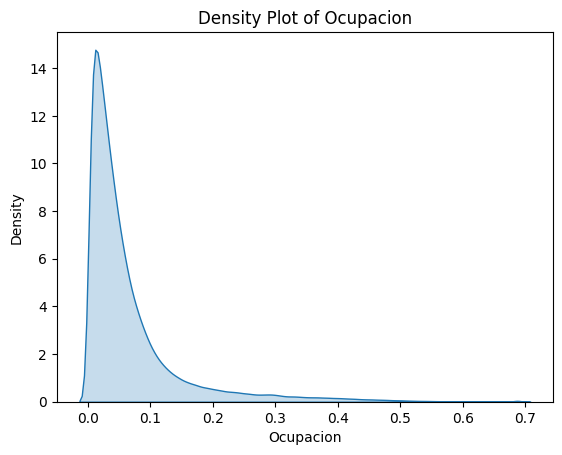

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'data_1' and 'ocupacion' is a column in this dataframe
# Create the density plot for 'ocupacion'
sns.kdeplot(np.log(data_1['ocupacion']+1), shade=True)

# Customize the plot
plt.title('Density Plot of Ocupacion')
plt.xlabel('Ocupacion')
plt.ylabel('Density')

# Show the plot
plt.show()


In [ ]:
pd.crosstab(preds["pred"], preds["ocupacion"])

ocupacion,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
pred,,,,,,,,,,,,,,,,,,,,,
1.0,38,5,4,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,3335,1483,1111,309,249,95,96,46,50,29,...,0,0,0,0,0,1,0,1,0,0
3.0,9555,5565,4817,1613,1475,610,666,293,363,143,...,1,0,0,1,0,0,0,2,3,3
4.0,10844,9188,9553,3496,3623,1477,1589,690,942,439,...,0,2,1,0,0,0,1,8,11,5
5.0,7958,9068,12147,5251,6189,2571,3097,1418,1716,823,...,0,2,0,3,1,1,1,14,14,2
6.0,5391,6746,11057,5700,7068,3191,4019,1839,2500,1195,...,7,0,0,4,2,2,0,20,12,10
7.0,3759,4733,8309,4652,6565,3156,4201,1958,2684,1351,...,0,1,1,1,0,1,3,8,17,4
8.0,2863,3771,6896,4035,6002,3144,4176,1965,2695,1216,...,3,1,1,1,0,2,1,6,12,7
9.0,1824,2288,4413,2944,4559,2393,3309,1618,2247,1042,...,1,1,0,2,2,1,5,2,11,7


## Learnt Lessons

- Family models poisson/exponential/gamma
- Traditional models might be a great fit
- Preprocessing/statistical association & hypothesis and underlying distribution understanding is key
- From distribution -> MLE -> modelling lambda/mean/p (binomial/logistic)
- Poisson -> negative binomial -> beta model
- efectos de variables/conclusions